In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('Final_Data.csv')
titles = pd.read_csv('Final_Titles.csv')

In [9]:
df.head(5)

,original_language,popularity,runtime,vote_average,vote_count,budget,release_date,genre_Documentary,genre_Mystery,genre_Music,...,Denzel Washington,Tom Hanks,Tom Cruise,Julia Roberts,Owen Wilson,Harrison Ford,Cameron Diaz,Julianne Moore,Robin Williams,cast_g10
0,1,150.437577,162.0,7.2,11800,237000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,139.082615,169.0,6.9,4500,300000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,107.376788,148.0,6.3,4466,245000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,112.312950,165.0,7.6,9106,250000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,43.926995,132.0,6.1,2124,260000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# MinMax Scaling for the dataset before applying PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

In [14]:
## Applying PCA retaining 85% variablity
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85,svd_solver='auto')
principalComponents = pca.fit_transform(df_scaled)

pcadf=pd.DataFrame(principalComponents)

In [22]:
pca.explained_variance_

array([0.40919454, 0.3507452 , 0.27446438, 0.22572337, 0.21226001,
       0.19536928, 0.16117071, 0.14290873, 0.13513769, 0.10976336,
       0.09507593, 0.0878661 , 0.07987678, 0.07688653, 0.07192987,
       0.06574347, 0.06225258, 0.05974505, 0.05917755, 0.05369   ,
       0.05127141, 0.04743532, 0.04318801, 0.04160106, 0.03805502,
       0.03564447])

In [15]:
pcadf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.817195,0.784003,-0.420159,-0.542041,-0.574175,1.038814,-0.043546,0.159343,0.200533,-0.377582,...,-0.172181,-0.219593,-0.252369,-0.425393,0.495664,-0.153044,-0.318377,0.102019,-0.180489,0.198848
1,0.633697,0.734201,-0.661548,0.285503,-0.787365,0.020152,-0.588083,0.153542,-0.256419,0.081444,...,0.002583,-0.139631,0.057256,0.036006,-0.034082,-0.107636,0.156022,0.001586,0.017710,-0.253898
2,0.804787,0.523826,-0.798834,0.192832,-0.656535,-0.342824,-0.169087,0.262099,-0.582289,0.214226,...,0.002592,-0.124794,0.028491,-0.162511,-0.527959,0.650305,-0.218242,0.947668,-0.073435,0.040479
3,0.924680,-0.734366,-0.195029,-0.192366,-0.632402,-0.492067,0.590035,0.229366,-0.322954,0.039502,...,0.039097,0.357100,-0.072122,0.046413,0.020060,-0.092359,-0.150820,0.125239,-0.041706,0.130019
4,0.712028,0.804592,-0.058748,0.010759,-1.092794,0.463907,-0.117012,0.091244,0.277050,-0.217618,...,-0.096652,-0.000147,0.019734,0.126941,0.032559,0.307108,0.400019,0.754860,0.170372,-0.282527


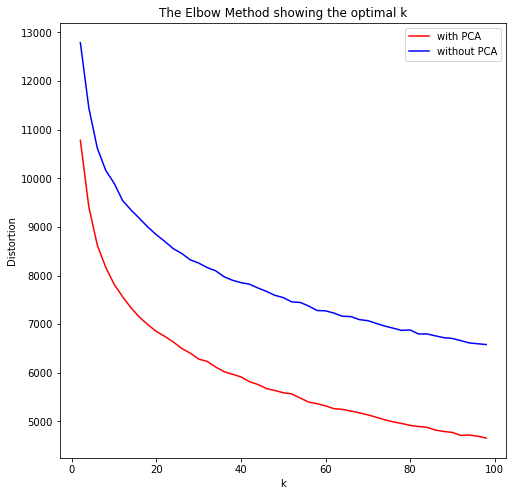

In [39]:
from sklearn.cluster import KMeans

## Comparison of Within-Cluster-Variation with and without PCA
distortions = []
distortions1 = []
K = range(2,100,2)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    distortions.append(kmeanModel.inertia_)
    kmeanModel1 = KMeans(n_clusters=k)
    kmeanModel1.fit(df_scaled)
    distortions1.append(kmeanModel1.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, distortions,'r', label = 'with PCA')
plt.plot(K, distortions1, 'b', label = 'without PCA')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend()
plt.show()

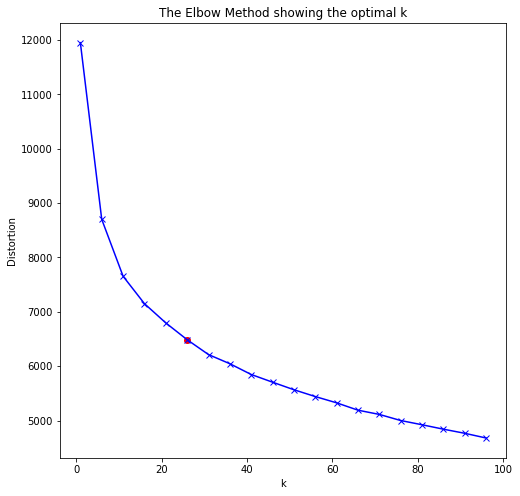

In [40]:
## Choosing optimal K 
distortions = []
K = range(1,100,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.scatter(26, distortions[5], marker = 'o', color = 'r')
plt.show()

In [53]:
## Fitting K-Means Clustering for optimal K = 20
kmeanModel = KMeans(n_clusters=20)
kmeanModel.fit(pcadf)

labels = kmeanModel.labels_

In [74]:
## Function to recommend a movie based on the input movie
def get_recom(movie):
    for i in range(len(titles)):
        if titles['title'][i] == movie:
            movie_id = i
            label = labels[i]

    ids = [] # id of movies with same label 
    for i in range(len(labels)):
        if labels[i] == label and i!= movie_id :
            ids.append(i)

    distance_dict = {} # dictionary containing movie names and euclidean distance with given movie
    for id_ in ids:
        dist = np.linalg.norm(df_scaled.iloc[movie_id,:] - df_scaled.iloc[id_,:])
        distance_dict[id_] = dist 

    sorted_id = sorted(distance_dict.items(), key=lambda x: x[1])
    recom_id = [sorted_id[i][0] for i in range(5)]
    recom_title = [titles.iloc[id_]['title'] for id_ in recom_id]
    print("Your Recommendations for the movie \'" + movie + "\' is:") 
    for i in recom_title:
        print(i)

In [75]:
get_recom('Batman Begins')

Your Recommendations for the movie 'Batman Begins' is:
The Dark Knight Rises
The Dark Knight
The Punisher
Bronson
The Sweeney


In [76]:
get_recom('The Conjuring')

Your Recommendations for the movie 'The Conjuring' is:
Insidious
Insidious: Chapter 2
Lost Souls
28 Days Later
Final Destination


In [77]:
get_recom('Tangled')

Your Recommendations for the movie 'Tangled' is:
Monsters University
Dinosaur
Home on the Range
The Good Dinosaur
WALL·E


In [78]:
get_recom('The Pianist')

Your Recommendations for the movie 'The Pianist' is:
The Boy in the Striped Pyjamas
The Pursuit of Happyness
The Last King of Scotland
War Horse
Wild


In [79]:
get_recom('Before Sunset')

Your Recommendations for the movie 'Before Sunset' is:
Before Midnight
Revolutionary Road
Water for Elephants
The Best of Me
The Vow


In [23]:
## Function to see what movies are there in a particular cluster
def get_movies_by_label(label_id):
    for index,label in enumerate(labels):
        if label == label_id:
            print(titles.loc[index, 'title'])

# get_movies_by_label(12)